In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

concentration = [
    0.000199, 0.000179, 0.000159, 0.000139, 0.000119, 0.0000995,
    0.0000796, 0.0000597, 0.0000398, 0.0000199
]
overall_resistance = [
    4.605, 4.158, 3.947, 3.632, 3.211, 2.974,
    2.605, 2.263, 1.921, 1.579
]

plt.figure(figsize=(8,6))
plt.plot(concentration, overall_resistance, marker='o', linestyle='-')
plt.xlabel("Concentration of FD&C Red #40 Dye (M)")
plt.ylabel("Overall Resistance (Ω)")
plt.title("Overall Resistance vs. Dye Concentration")
plt.show()


In [48]:
import statsmodels.api as sm

concentration_mod= sm.add_constant(concentration, prepend=False)
model = sm.OLS(np.array(overall_resistance),np.array(concentration_mod))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4325.
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           3.18e-12
Time:                        15:49:22   Log-Likelihood:                 17.776
No. Observations:                  10   AIC:                            -31.55
Df Residuals:                       8   BIC:                            -30.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.665e+04    253.231     65.764      0.0

c:\Users\rahul\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [50]:
X = np.arange(start=min(concentration), stop=max(concentration), step=0.000001)
X_mod = sm.add_constant(X, prepend=False)
Y = res.predict((X_mod))


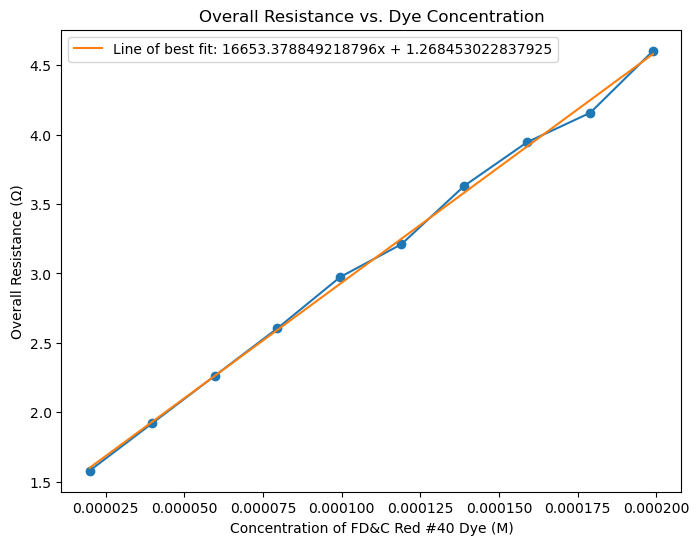

In [54]:
bestfit = "Line of best fit: " + str(res.params[0]) + "x + " + str(res.params[1])

plt.figure(figsize=(8,6))
plt.plot(concentration, overall_resistance, marker='o', linestyle='-')
plt.plot(X, Y, label=bestfit)
plt.xlabel("Concentration of FD&C Red #40 Dye (M)")
plt.ylabel("Overall Resistance (Ω)")
plt.title("Overall Resistance vs. Dye Concentration")
plt.legend()
plt.show()